In [ ]:
import pandas as pd


In [ ]:
data = pd.read_excel("Book1mc.xlsx")

In [ ]:
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Check missing values
print(data.isnull().sum())


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
missing_income_data = data[data['Income'].isnull()]
print(missing_income_data['Response'].value_counts())

Response
0    23
1     1
Name: count, dtype: int64


In [ ]:
print(data['Response'].value_counts())

Response
0    1906
1     334
Name: count, dtype: int64


In [ ]:
# Drop missing income rows
data = data.dropna(subset=['Income'])

# Drop ID and Z_CostContact (irrelevant columns)
data = data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [ ]:
# Check missing values
print(data.isnull().sum())

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   int64 

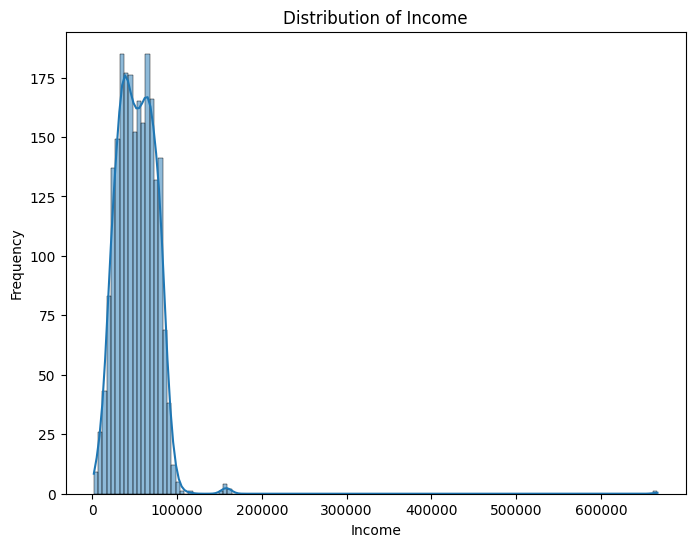

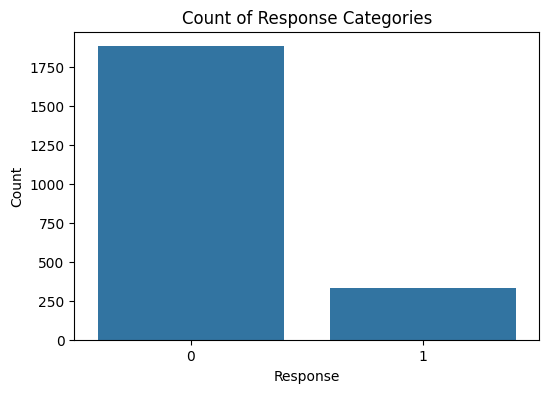

In [ ]:
# Visualize the distribution of Income
plt.figure(figsize=(8, 6))
sns.histplot(data['Income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of Response categories
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=data)
plt.title('Count of Response Categories')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

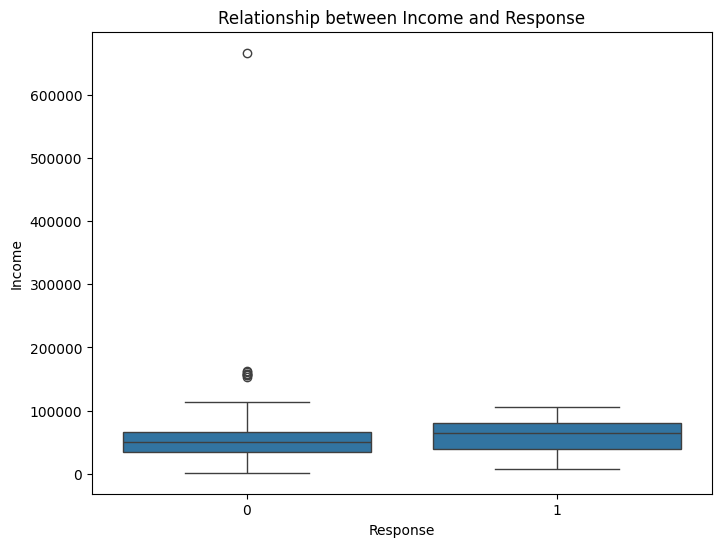

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='Income', data=data)
plt.title('Relationship between Income and Response')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

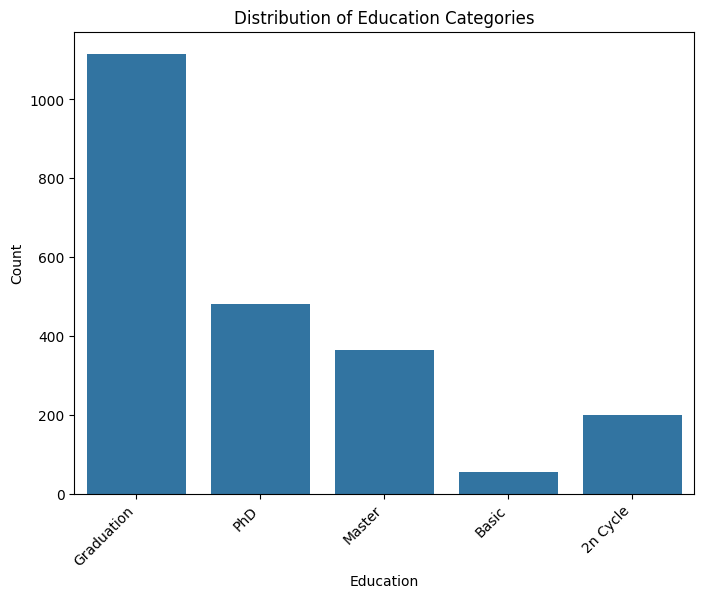

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data)
plt.title('Distribution of Education Categories')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

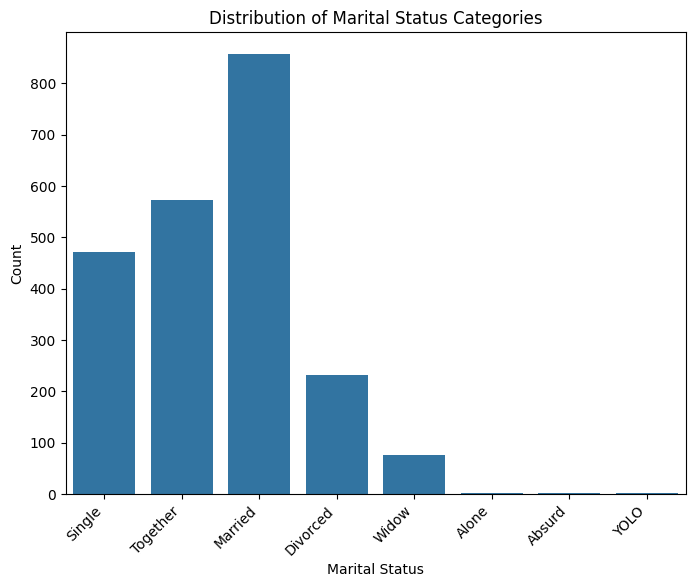

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital_Status', data=data)
plt.title('Distribution of Marital Status Categories')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

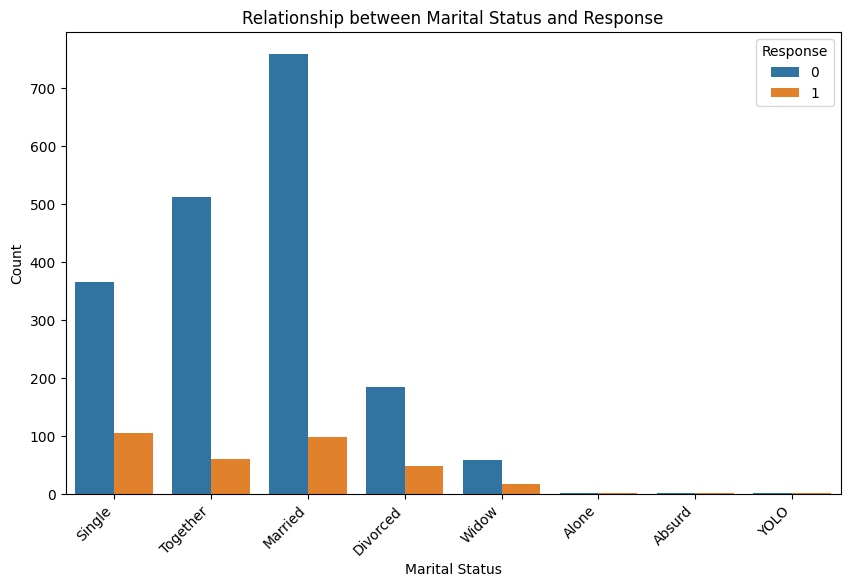

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Response', data=data)
plt.title('Relationship between Marital Status and Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Response')
plt.show()

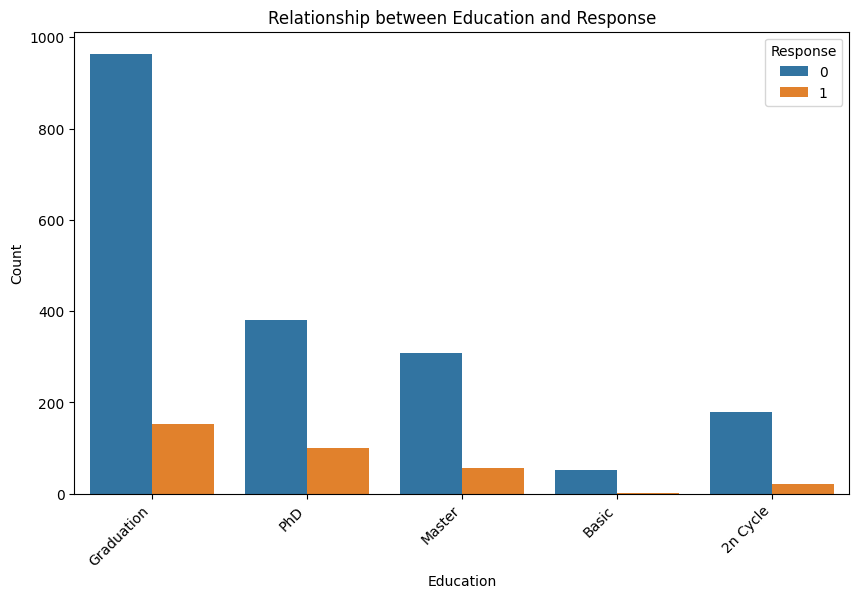

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Response', data=data)
plt.title('Relationship between Education and Response')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Response')
plt.show()

In [ ]:
# Age
data['Age'] = 2024 - data['Year_Birth']

In [ ]:
# Total spend on all products
data['Total_Spend'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [ ]:
# Combine kids and teens
data['Family_Size'] = data['Kidhome'] + data['Teenhome']


In [ ]:
# Drop Year_Birth (already used)
data.drop('Year_Birth', axis=1, inplace=True)

In [ ]:
print(data.head())

    Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  Graduation         Single  58138.0        0         0  04-09-2012       58   
1  Graduation         Single  46344.0        1         1  08-03-2014       38   
2  Graduation       Together  71613.0        0         0  21-08-2013       26   
3  Graduation       Together  26646.0        1         0  10-02-2014       26   
4         PhD        Married  58293.0        1         0  19-01-2014       94   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  AcceptedCmp4  \
0       635         88              546  ...             0             0   
1        11          1                6  ...             0             0   
2       426         49              127  ...             0             0   
3        11          4               20  ...             0             0   
4       173         43              118  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  R

In [ ]:
le = LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])


In [ ]:
X = data[['Age', 'Income', 'Family_Size', 'Education', 'Marital_Status',
        'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Total_Spend']]

y = data['Response']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

Accuracy: 0.8783783783783784

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       382
           1       0.61      0.37      0.46        62

    accuracy                           0.88       444
   macro avg       0.75      0.67      0.70       444
weighted avg       0.86      0.88      0.87       444



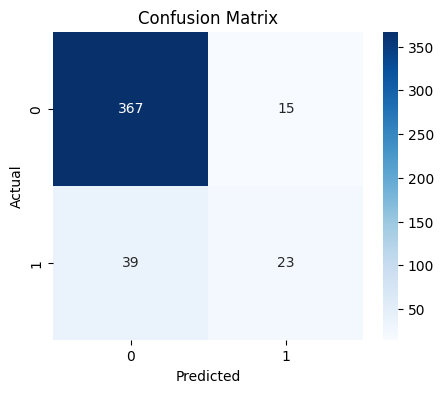

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


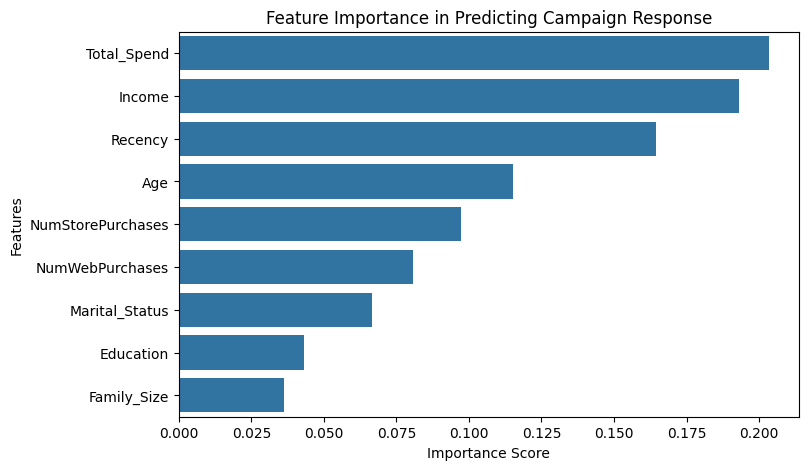

In [ ]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance in Predicting Campaign Response")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
